In [5]:
import pandas as pd
from utils.data_loader import load_data
pd.options.mode.chained_assignment = None

df, config, features = load_data()
kids_adult = "Adult" if config["is_adult"] else "Pediatric"

In [6]:
# idmax on 
prediction_columns = ['prediction.ALL', 'prediction.AML', 'prediction.APL']
df['prediction.ALL'].idxmax()

df["predicted_class"] = (
    df[prediction_columns]
    .idxmax(axis=1)
    .str.replace("prediction.", "", regex=False)
)

df_false = df[df["class"] != df["predicted_class"]]
df_true = df[df["class"] == df["predicted_class"]]

/tmp/ipykernel_177496/274079905.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_labels_aml)
/tmp/ipykernel_177496/274079905.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_labels_apl)
/tmp/ipykernel_177496/274079905.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(new_labels_all)


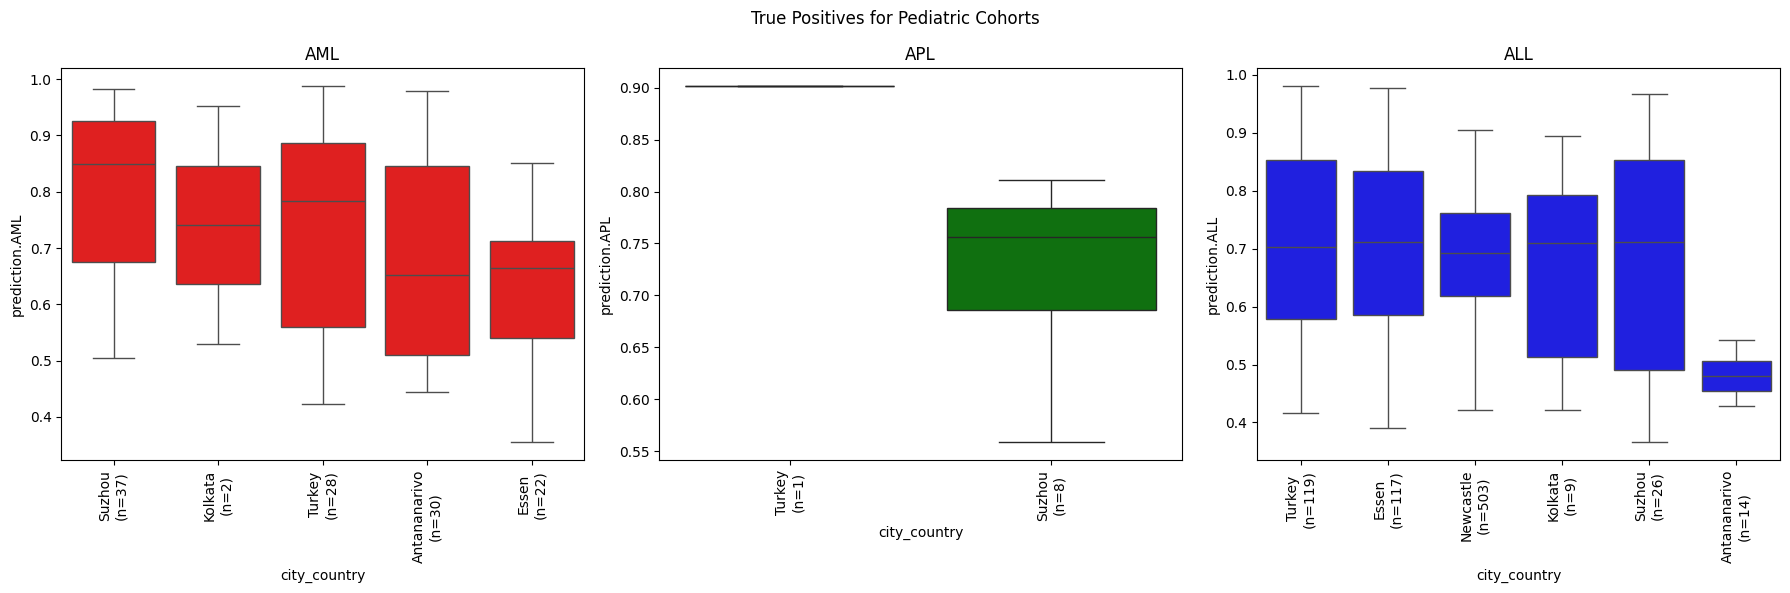

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Replace Vessen with Essen in the dataframe
df_true['city_country'] = df_true['city_country'].replace('Vessen', 'Essen')

# AML
aml_true = df_true[df_true['class'] == 'AML']
mean_preds_aml = aml_true.groupby('city_country')['prediction.AML'].mean().sort_values(ascending=False)
aml_true = aml_true.sort_values(by='prediction.AML', ascending=False)
sns.boxplot(ax=axes[0], x='city_country', y='prediction.AML', data=aml_true, 
            order=mean_preds_aml.index, color='red', showfliers=False)
axes[0].set_title('AML')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Add n values to x-axis labels for AML
aml_counts = aml_true['city_country'].value_counts()
new_labels_aml = [f'{city}\n(n={aml_counts[city]})' for city in mean_preds_aml.index]
axes[0].set_xticklabels(new_labels_aml)

# APL
apl_true = df_true[df_true['class'] == 'APL']
mean_preds_apl = apl_true.groupby('city_country')['prediction.APL'].mean().sort_values(ascending=False)
apl_true = apl_true.sort_values(by='prediction.APL', ascending=False)
sns.boxplot(ax=axes[1], x='city_country', y='prediction.APL', data=apl_true, 
            order=mean_preds_apl.index, color='green', showfliers=False)
axes[1].set_title('APL')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Add n values to x-axis labels for APL
apl_counts = apl_true['city_country'].value_counts()
new_labels_apl = [f'{city}\n(n={apl_counts[city]})' for city in mean_preds_apl.index]
axes[1].set_xticklabels(new_labels_apl)

# ALL
all_true = df_true[df_true['class'] == 'ALL']
mean_preds_all = all_true.groupby('city_country')['prediction.ALL'].mean().sort_values(ascending=False)
all_true = all_true.sort_values(by='prediction.ALL', ascending=False)
sns.boxplot(ax=axes[2], x='city_country', y='prediction.ALL', data=all_true, 
            order=mean_preds_all.index, color='blue', showfliers=False)
axes[2].set_title('ALL')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Add n values to x-axis labels for ALL
all_counts = all_true['city_country'].value_counts()
new_labels_all = [f'{city}\n(n={all_counts[city]})' for city in mean_preds_all.index]
axes[2].set_xticklabels(new_labels_all)

# Set the overall title
fig.suptitle(f'True Positives for {kids_adult} Cohorts')

# Adjust layout
fig.tight_layout()

plt.savefig(f"TruePositives{kids_adult}.svg")

# Display the plot
plt.show()

/tmp/ipykernel_177496/4149760697.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_labels_aml)
/tmp/ipykernel_177496/4149760697.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_labels_apl)
/tmp/ipykernel_177496/4149760697.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(new_labels_all)


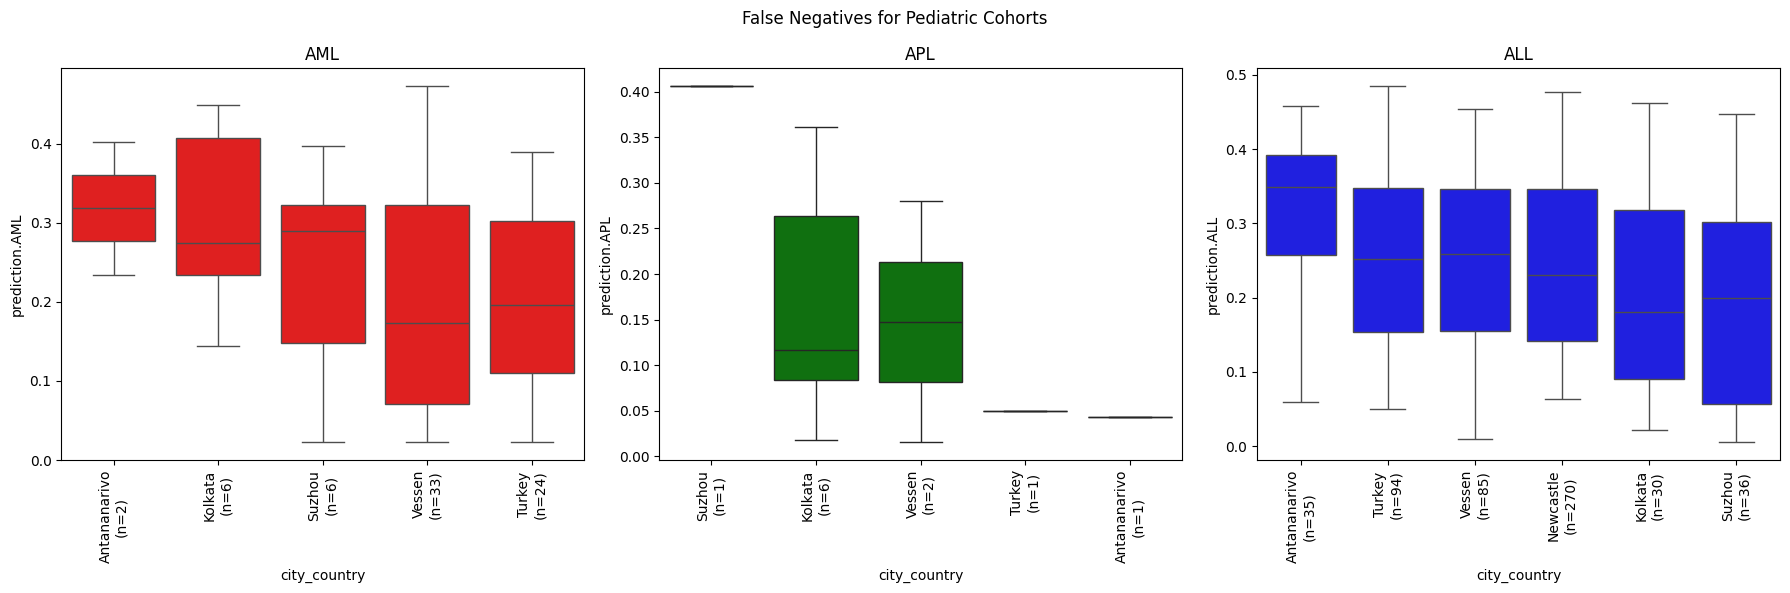

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# AML
aml_false = df_false[df_false['class'] == 'AML']
mean_preds_aml = aml_false.groupby('city_country')['prediction.AML'].mean().sort_values(ascending=False)
aml_false = aml_false.sort_values(by='prediction.AML', ascending=False)
sns.boxplot(ax=axes[0], x='city_country', y='prediction.AML', data=aml_false, 
            order=mean_preds_aml.index, color='red', showfliers=False)
axes[0].set_title('AML')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Add n values to x-axis labels for AML
aml_counts = aml_false['city_country'].value_counts()
new_labels_aml = [f'{city}\n(n={aml_counts[city]})' for city in mean_preds_aml.index]
axes[0].set_xticklabels(new_labels_aml)

# APL
apl_false = df_false[df_false['class'] == 'APL']
mean_preds_apl = apl_false.groupby('city_country')['prediction.APL'].mean().sort_values(ascending=False)
apl_false = apl_false.sort_values(by='prediction.APL', ascending=False)
sns.boxplot(ax=axes[1], x='city_country', y='prediction.APL', data=apl_false, 
            order=mean_preds_apl.index, color='green', showfliers=False)
axes[1].set_title('APL')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Add n values to x-axis labels for APL
apl_counts = apl_false['city_country'].value_counts()
new_labels_apl = [f'{city}\n(n={apl_counts[city]})' for city in mean_preds_apl.index]
axes[1].set_xticklabels(new_labels_apl)

# ALL
all_false = df_false[df_false['class'] == 'ALL']
mean_preds_all = all_false.groupby('city_country')['prediction.ALL'].mean().sort_values(ascending=False)
all_false = all_false.sort_values(by='prediction.ALL', ascending=False)
sns.boxplot(ax=axes[2], x='city_country', y='prediction.ALL', data=all_false, 
            order=mean_preds_all.index, color='blue', showfliers=False)
axes[2].set_title('ALL')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Add n values to x-axis labels for ALL
all_counts = all_false['city_country'].value_counts()
new_labels_all = [f'{city}\n(n={all_counts[city]})' for city in mean_preds_all.index]
axes[2].set_xticklabels(new_labels_all)

# Set the overall title
fig.suptitle(f'False Negatives for {kids_adult} Cohorts')

# Adjust layout
fig.tight_layout()

plt.savefig(f"FalseNegatives{kids_adult}.svg")

# Display the plot
plt.show()